In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from umap.umap_ import UMAP
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, HDBSCAN

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

2023-10-25 22:18:16.346479: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
groups = pd.read_json('babynamesDB_groups.json')
groups = groups[groups['num_users_stored'] > 3]
group_ids = groups['_id'].to_list()

In [3]:
users = pd.read_json('babynamesDB_users.json')
users['num_groups'] = [len(i) for i in users['groups']]
users = users[['_id' , 'num_comments_stored', 'groups', 'num_posts_stored', 'num_groups']]
users = users.explode('groups')
users = users[users['groups'].isin(group_ids)]
users = pd.concat([users, pd.get_dummies(users['groups'], dtype=float)], axis=1)
users = users.groupby('_id').sum()
users = users.drop(columns=['groups'])

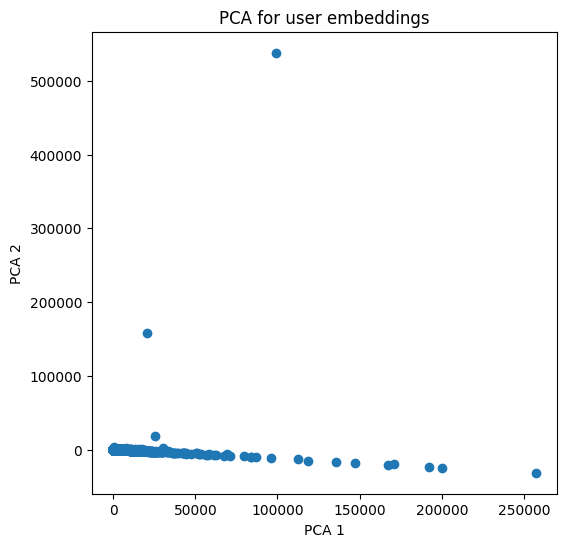

/usr/local/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


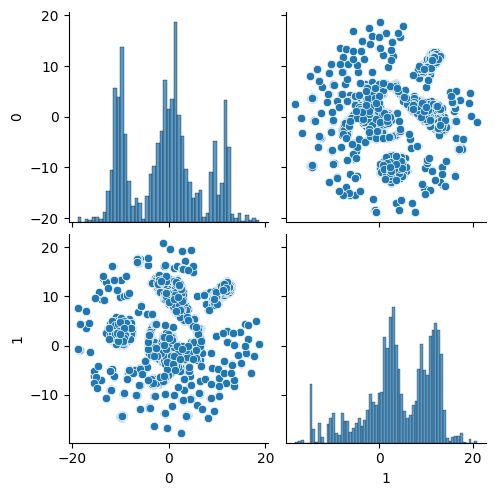

In [4]:
# Dimensionality Reduction

pca = PCA(n_components=2)
pca_result = pca.fit_transform(users)

plt.figure(figsize=(6, 6))
plt.scatter(pca_result[:,0], pca_result[:,1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA for user embeddings')
plt.show()

# umap for 2 components
umap = UMAP(n_components=2)
umap_result = umap.fit_transform(users.sample(frac=0.1))

sns.pairplot(pd.DataFrame(umap_result), height=2.5)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


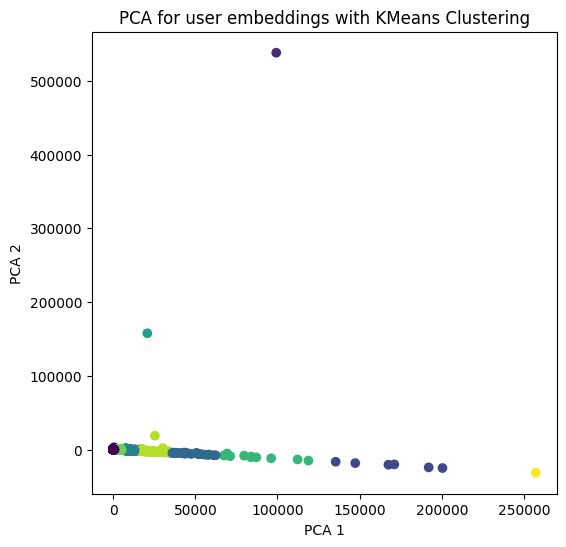

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


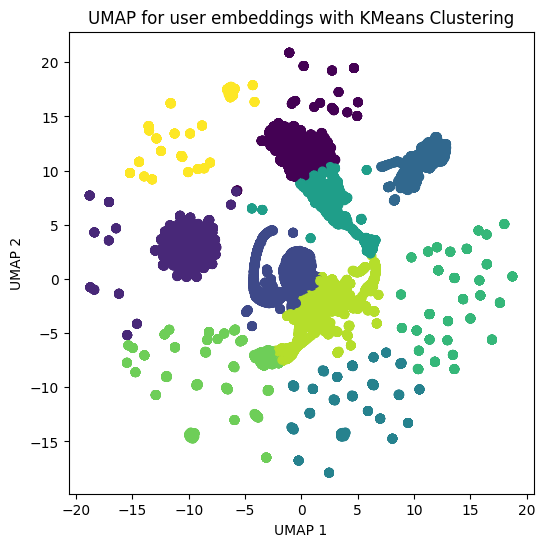

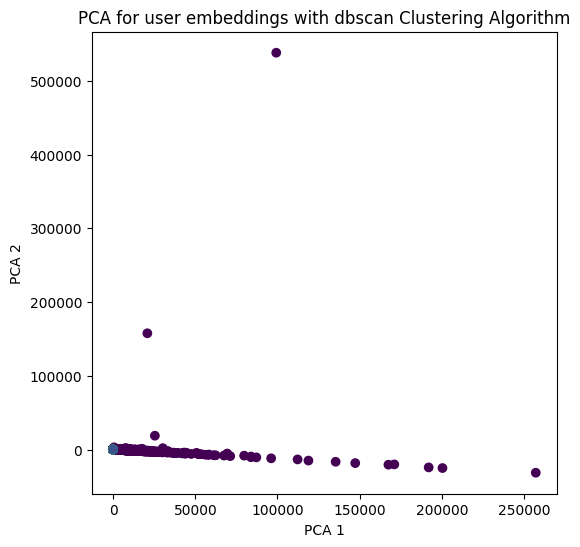

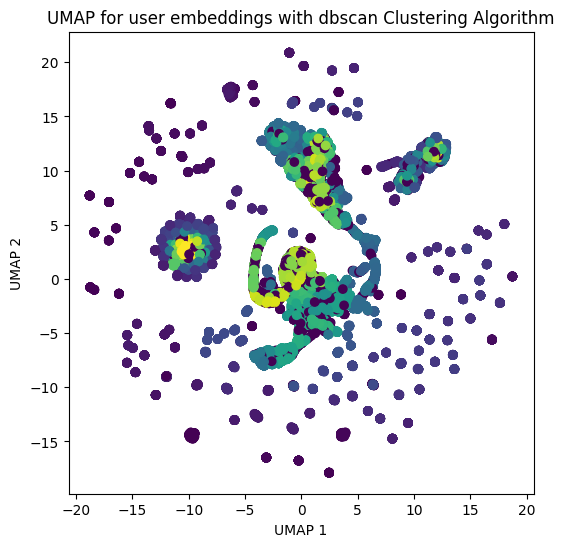

In [5]:
# Clustering

kmeans = KMeans(n_clusters=10)
kmeans.fit(pca_result)

plt.figure(figsize=(6, 6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=kmeans.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA for user embeddings with KMeans Clustering')
plt.show()

kmeans.fit(umap_result)

plt.figure(figsize=(6, 6))
plt.scatter(umap_result[:,0], umap_result[:,1], c=kmeans.labels_)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP for user embeddings with KMeans Clustering')
plt.show()

dbscan = HDBSCAN(min_cluster_size=10)
dbscan.fit(pca_result)

plt.figure(figsize=(6, 6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=dbscan.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA for user embeddings with dbscan Clustering Algorithm')
plt.show()

dbscan.fit(umap_result)

plt.figure(figsize=(6, 6))
plt.scatter(umap_result[:,0], umap_result[:,1], c=dbscan.labels_)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP for user embeddings with dbscan Clustering Algorithm')
plt.show()


In [9]:
# accuracy metrics

#print('PCA KMeans Silhouette Score: ', silhouette_score(pca_result, kmeans.labels_))
#print('PCA KMeans Davies Bouldin Score: ', davies_bouldin_score(pca_result, kmeans.labels_))
#print('PCA KMeans Calinski Harabasz Score: ', calinski_harabasz_score(pca_result, kmeans.labels_))

print('UMAP KMeans Silhouette Score: ', silhouette_score(umap_result, kmeans.labels_))
print('UMAP KMeans Davies Bouldin Score: ', davies_bouldin_score(umap_result, kmeans.labels_))
print('UMAP KMeans Calinski Harabasz Score: ', calinski_harabasz_score(umap_result, kmeans.labels_))

#print('PCA dbscan Silhouette Score: ', silhouette_score(pca_result, dbscan.labels_))
#print('PCA dbscan Davies Bouldin Score: ', davies_bouldin_score(pca_result, dbscan.labels_))
#print('PCA dbscan Calinski Harabasz Score: ', calinski_harabasz_score(pca_result, dbscan.labels_))

print('UMAP dbscan Silhouette Score: ', silhouette_score(umap_result, dbscan.labels_))
print('UMAP dbscan Davies Bouldin Score: ', davies_bouldin_score(umap_result, dbscan.labels_))
print('UMAP dbscan Calinski Harabasz Score: ', calinski_harabasz_score(umap_result, dbscan.labels_))

UMAP KMeans Silhouette Score:  0.558456
UMAP KMeans Davies Bouldin Score:  0.7253301064228173
UMAP KMeans Calinski Harabasz Score:  58482.903462206625
UMAP dbscan Silhouette Score:  0.4588176
UMAP dbscan Davies Bouldin Score:  1.1885141290577965
UMAP dbscan Calinski Harabasz Score:  375.64754174207934
